In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mushrooms_df = pd.read_csv('data/mushrooms.csv')
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


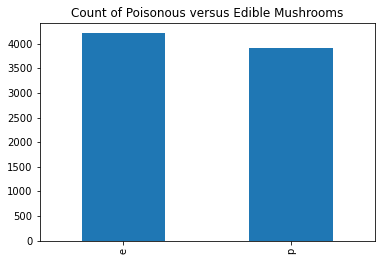

In [3]:
# Convert class column to binary - poison = 1 and edible = 0
mushrooms_lethal_count = mushrooms_df['class'].value_counts()

mushrooms_lethal_count.plot(kind='bar');
plt.title('Count of Poisonous versus Edible Mushrooms');

In [4]:
mushrooms_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

/Users/ellengrove/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


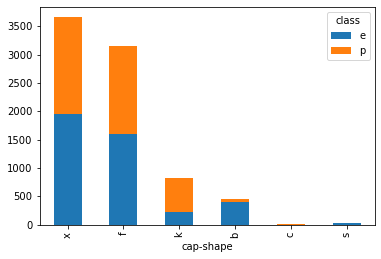

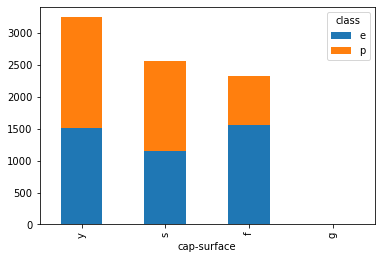

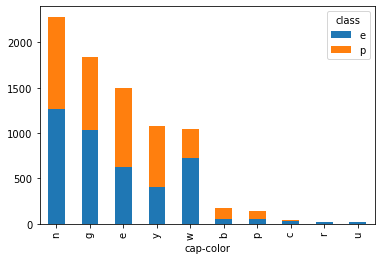

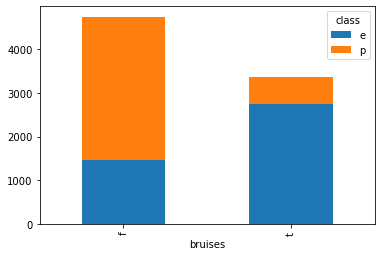

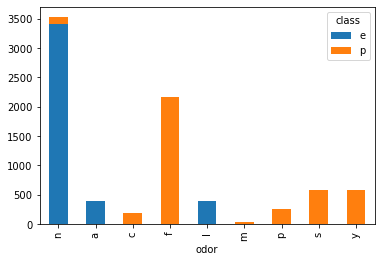

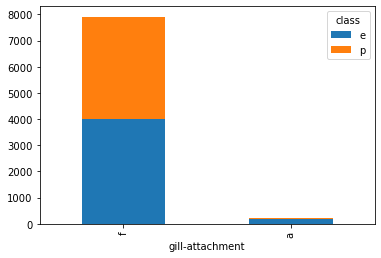

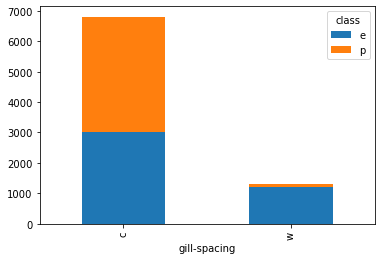

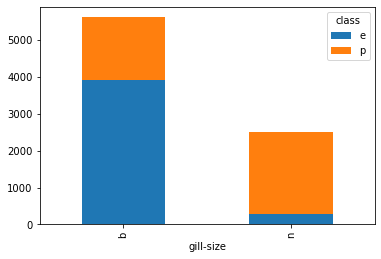

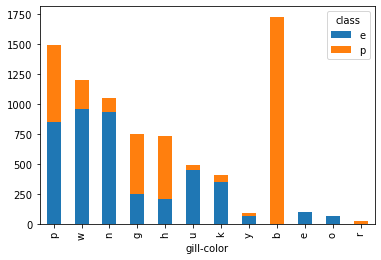

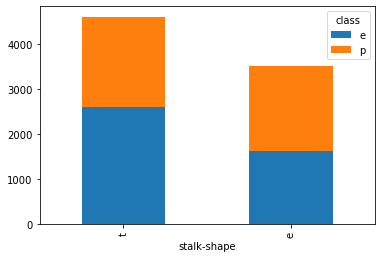

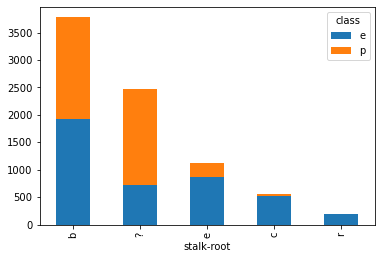

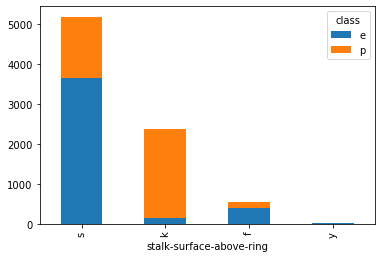

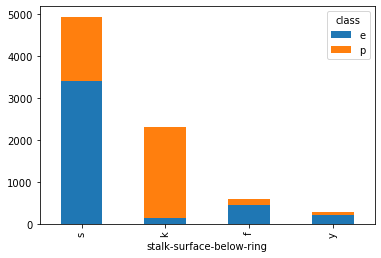

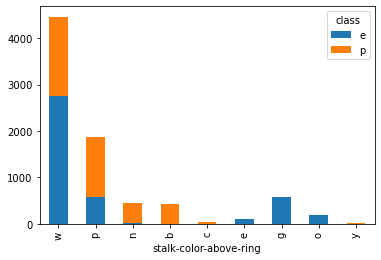

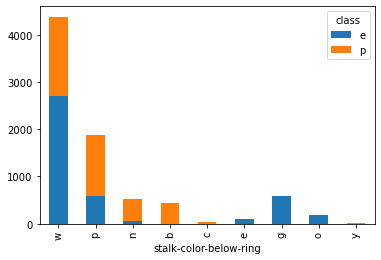

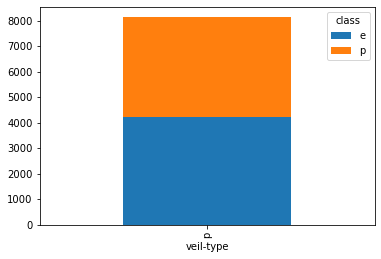

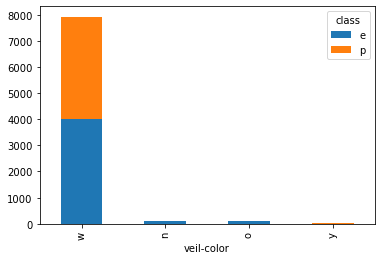

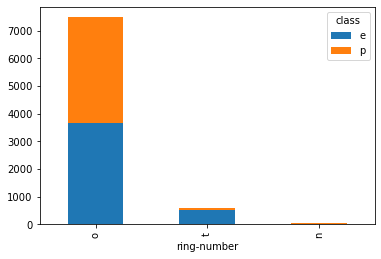

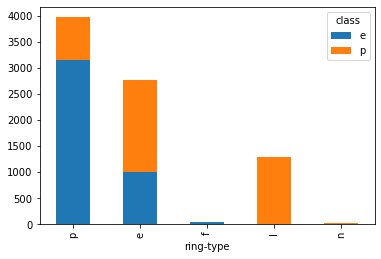

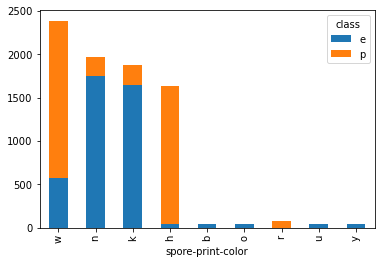

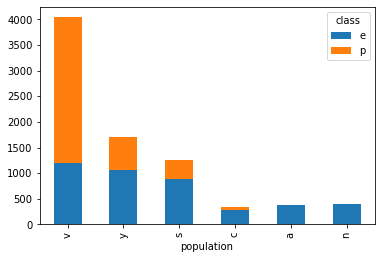

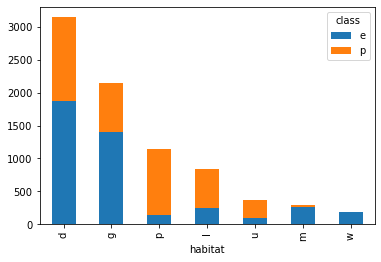

In [5]:
# Plot value counts for each feature
for column in mushrooms_df.columns[1:]:
    data = mushrooms_df[[column,'class']].value_counts().\
        rename_axis([column,'class']).reset_index(name='counts')
    data = data.pivot(index=column,columns='class',values='counts')
    data['sort_count'] = data['e'] + data['p']
    data.sort_values(by='sort_count',inplace=True,ascending=False)
    data.drop(columns='sort_count').plot.bar(stacked=True);

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
X = pd.get_dummies(mushrooms_df.drop(columns='class'))
pca.fit(X)
transformed = pca.transform(X)
print(pca.explained_variance_ratio_)

[0.16810879 0.13889755 0.09744943 0.06340839 0.04018563 0.03685252
 0.03133466 0.02774818 0.02653229 0.02076807 0.0204827  0.01858035
 0.01787498 0.01695892 0.01531139 0.0152811  0.01468099 0.01403851
 0.01332607 0.01153639 0.01078345 0.01067795 0.01036745 0.00946689
 0.0087253  0.0085852  0.00820279 0.00763751 0.00732157 0.00698259
 0.0065505 ]


In [7]:
# X.astype('int16')

In [8]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, init='random', perplexity=10,random_state=9).fit_transform(X.values)

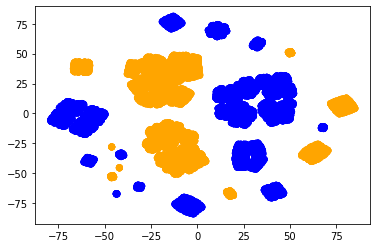

In [9]:
colors = ['orange' if classification == 'p' else 'blue' for classification in list(mushrooms_df['class'])]
x_scatter = [coord[0] for coord in X_tsne]
y_scatter = [coord[1] for coord in X_tsne]
plt.scatter(x_scatter,y_scatter,c=colors);

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsne,mushrooms_df['class'],random_state=9)

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=9)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [12]:
print(y_test)
print(clf.predict(X_test))

4818    p
2425    e
7414    p
1474    e
5368    p
       ..
4023    p
4279    p
3324    e
975     e
6710    p
Name: class, Length: 2031, dtype: object
['p' 'e' 'p' ... 'e' 'e' 'p']


In [13]:
sum(clf.feature_importances_)

1.0